In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier , export_text,plot_tree
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r"C:\Users\scet2\OneDrive\Dokumente\decisiontreexlsx.csv")

In [7]:
df


,SI.No,AGE,INCOME,STUDENT,CREDIT_RATING,BUYS_COMPUTER
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle-age,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes
5,6,senior,low,yes,excellent,no
6,7,middle-age,low,yes,excellent,yes
7,8,youth,medium,no,fair,no
8,9,youth,low,yes,fair,yes
9,10,senior,medium,yes,fair,yes


In [9]:
print("Initial Data Type and First Few Rows:")
print(df.dtypes)
print(df.head())

Initial Data Type and First Few Rows:
SI.No             int64
AGE              object
INCOME           object
STUDENT          object
CREDIT_RATING    object
BUYS_COMPUTER    object
dtype: object
   SI.No         AGE  INCOME STUDENT CREDIT_RATING BUYS_COMPUTER
0      1       youth    high      no          fair            no
1      2       youth    high      no     excellent            no
2      3  middle-age    high      no          fair           yes
3      4      senior  medium      no          fair           yes
4      5      senior     low     yes          fair           yes


In [13]:
label_encoder={}
for column in df.columns:
    if df[column].dtype=='object':
        print(f"encoding column:{column}")
        le=LabelEncoder()
        df[column]=le.fit_transform(df[column])
        label_encoder[column]=le

encoding column:INCOME
encoding column:STUDENT
encoding column:CREDIT_RATING
encoding column:BUYS_COMPUTER


In [15]:
print("\nData after Encoding:")
print(df.head())


Data after Encoding:
   SI.No  AGE  INCOME  STUDENT  CREDIT_RATING  BUYS_COMPUTER
0      1    2       0        0              1              0
1      2    2       0        0              0              0
2      3    0       0        0              1              1
3      4    1       2        0              1              1
4      5    1       1        1              1              1


In [17]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [19]:
x

,SI.No,AGE,INCOME,STUDENT,CREDIT_RATING
0,1,2,0,0,1
1,2,2,0,0,0
2,3,0,0,0,1
3,4,1,2,0,1
4,5,1,1,1,1
5,6,1,1,1,0
6,7,0,1,1,0
7,8,2,2,0,1
8,9,2,1,1,1
9,10,1,2,1,1


In [21]:
y

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: BUYS_COMPUTER, dtype: int32

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [27]:
id3_tree=DecisionTreeClassifier(criterion="entropy",random_state=42)
id3_tree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [29]:
accuracy=id3_tree.score(x_test,y_test)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.60


In [35]:
tree_rule=export_text(id3_tree,feature_names=df.columns[:-1].tolist())
print(tree_rule)                      
                      

|--- STUDENT <= 0.50
|   |--- AGE <= 1.50
|   |   |--- SI.No <= 9.00
|   |   |   |--- class: 1
|   |   |--- SI.No >  9.00
|   |   |   |--- class: 0
|   |--- AGE >  1.50
|   |   |--- class: 0
|--- STUDENT >  0.50
|   |--- class: 1



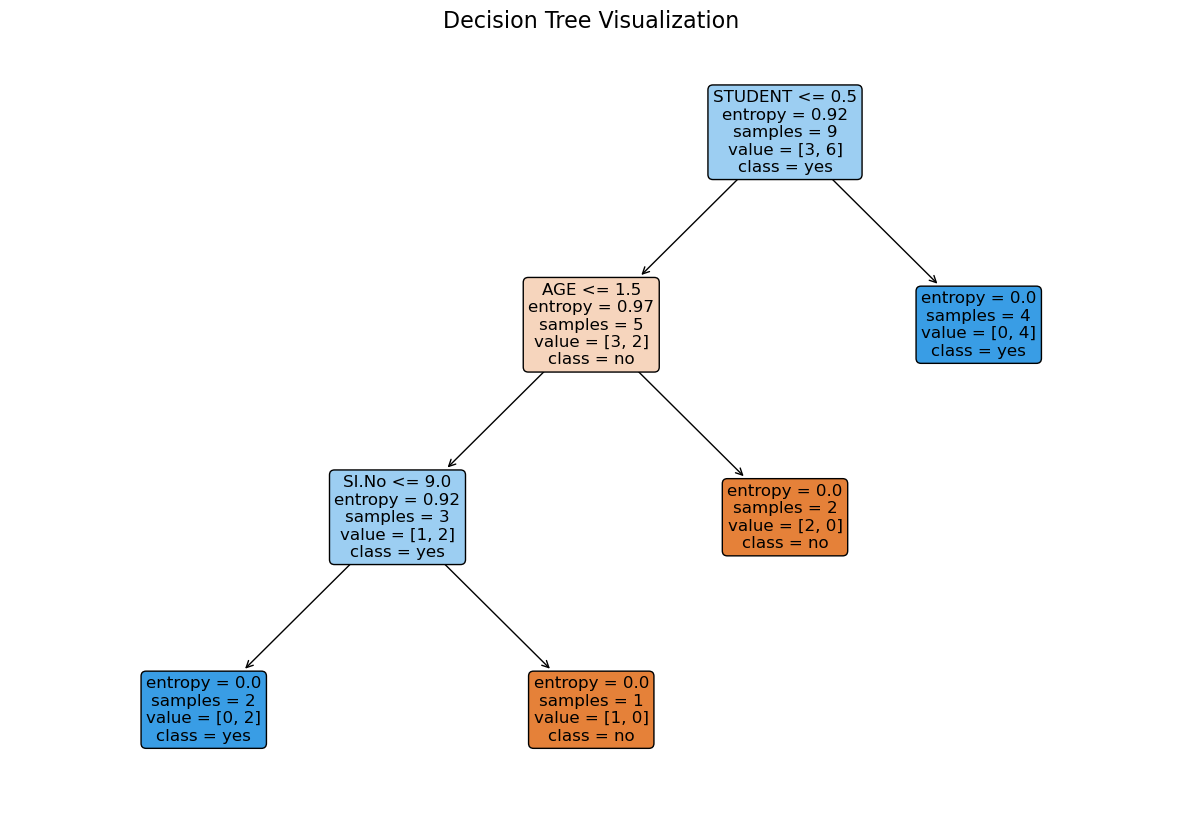

In [43]:
plt.figure(figsize=(15,10))
plot_tree(
    id3_tree,
    feature_names=df.columns[:-1],
    class_names=label_encoder["BUYS_COMPUTER"].inverse_transform([0,1]).astype(str),
    filled=True,
    rounded=True,
    fontsize=12,
    precision=2,
)
plt.title("Decision Tree Visualization",fontsize=16)
plt.show()
    